In [76]:
# IMPORT DATA MANAGEMENT AND VISUALIZATION LIBS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [258]:
# FEATURES
# survival -> Survival - 0 = No, 1 = Yes
# pclass   -> Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd
# sex      -> Sex
# Age      -> Age in years
# sibsp    -> # of siblings / spouses aboard the Titanic
# parch    -> # of parents / children aboard the Titanic
# ticket   -> Ticket number
# fare     -> Passenger fare
# cabin    -> Cabin number
# embarked -> Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

In [338]:
# LOAD TRAIN AND TEST DATASET
df_train = pd.read_csv("../dataset/titanic/train.csv")
df_test = pd.read_csv("../dataset/titanic/test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [339]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [340]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [341]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [342]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [343]:
df_train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [344]:
df_train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

## Plots

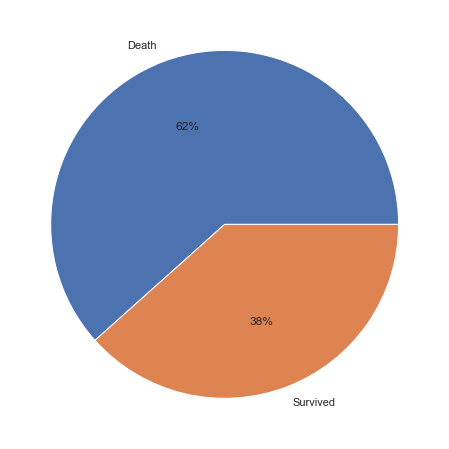

In [345]:
# SEE THE PERCENTAGE OF DEATHS AND SURVIVED PEOPLE
fig = plt.figure(figsize=(10, 8))
plt.pie(df_train["Survived"].value_counts(), labels=["Death", "Survived"] ,autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

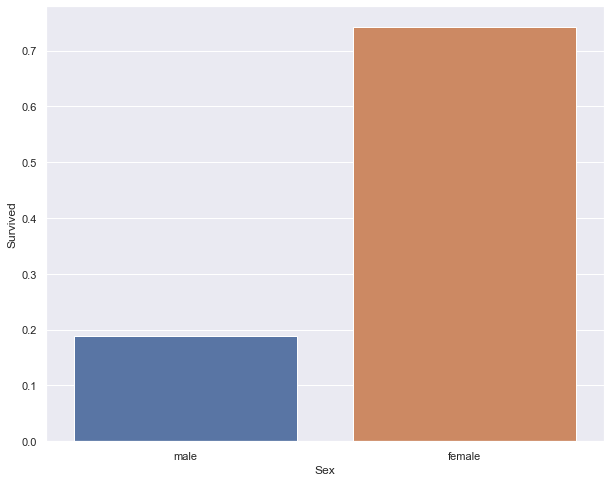

In [346]:
# NOW DIVIDED BY SEX
fig = plt.figure(figsize=(10, 8))
sns.barplot(data=df_train, y="Survived", x="Sex", ci=False)

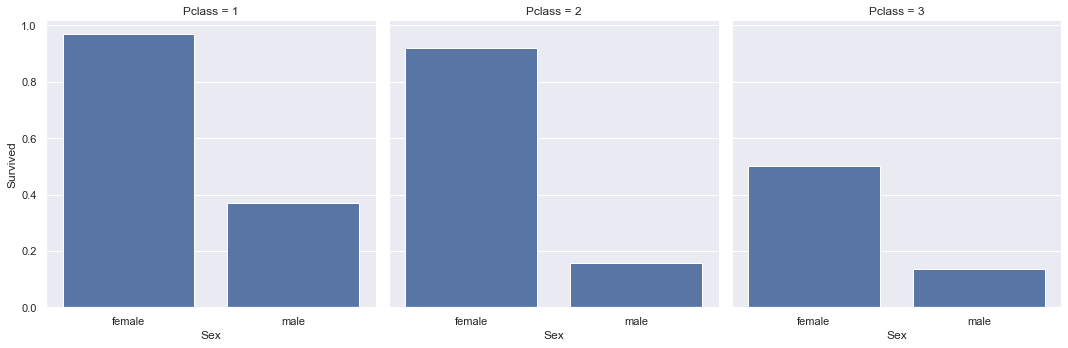

In [347]:
# CHECK SURVIVED BY SEX AND DIVIDED BY CLASS
grid = sns.FacetGrid(data=df_train, col="Pclass", height=5)
grid.map(sns.barplot, "Sex", "Survived", ci=False, order=['female', 'male'])
plt.show()

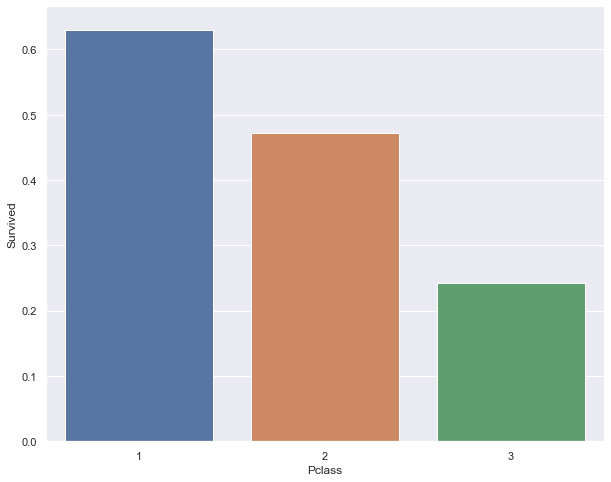

In [348]:
fig = plt.figure(figsize=(10,8))
sns.barplot(data=df_train, x="Pclass", y="Survived", ci=False)
plt.show()

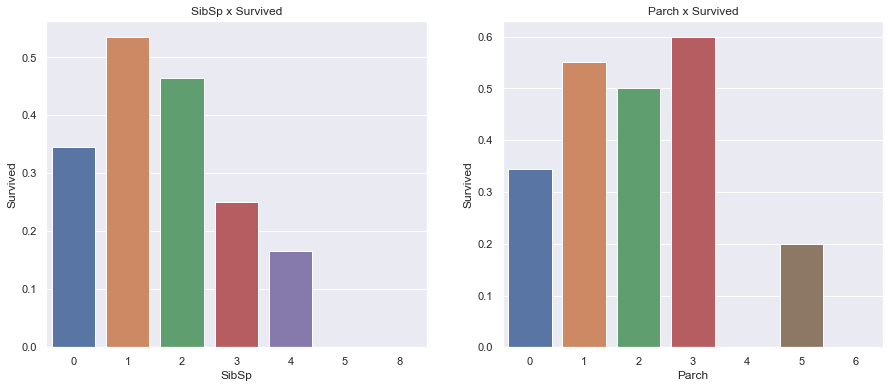

In [349]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.barplot(data=df_train, x="SibSp", y="Survived", ci=False)
plt.title("SibSp x Survived")

plt.subplot(1, 2, 2)
sns.barplot(data=df_train, x="Parch", y="Survived", ci=False)
plt.title("Parch x Survived")

plt.show()

Text(0.5, 1.0, 'SibSp x Survived')

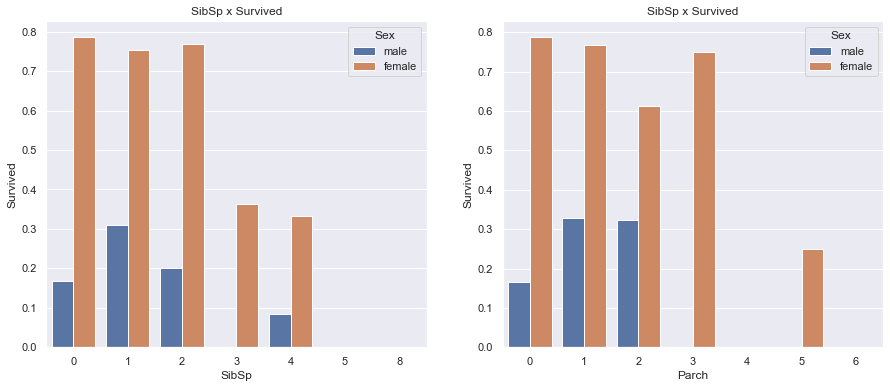

In [350]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.barplot(data=df_train, x="SibSp", y="Survived", ci=False, hue="Sex")
plt.title("SibSp x Survived")

plt.subplot(1, 2, 2)
sns.barplot(data=df_train, x="Parch", y="Survived", ci=False, hue="Sex")
plt.title("SibSp x Survived")

## Data Clean and Transform

In [351]:
# FIRST I WILL REMOTE ALL FEATURES THAT I THINK NOT WILL BE USEFULL
# I WILL REMOVE THE PassengerId, Name, Ticket, and Cabin
remove_features = ["PassengerId", "Name", "Ticket", "Cabin"]
df_train = df_train.drop(remove_features, axis=1)
df_test = df_test.drop(remove_features, axis=1)

# CHANGE THE Survived FEATURE TO A NEW VAR, THAT IS WHAT WE USE TO COMPARE ON THE TRAINING STEP
y_train = df_train["Survived"]
df_train = df_train.drop("Survived", axis=1)

### Missing Values - Age

In [352]:
print(f"\033[1m Missing Age Values\033[0m")
print(f"Total: {df_train['Age'].isnull().sum()}")

 Missing Age Values
Total of Missing Age:177


In [353]:
# THE AGE FEATURES HAVE SOME MISSING VALUES
# I ADD TO THIS LINES THE MEAN OF AGE BASED ON THE SEX

# USE ALL AGES (THE TRAIN AND TEST) TO CALCULATE THE MEAN
df_temp = pd.concat([df_train, df_test])

# GET MEAN
age_female_mean = df_temp.groupby("Sex")["Age"].mean()["female"]
age_male_mean = df_temp.groupby("Sex")["Age"].mean()["male"]

missing_female_before = df_train.loc[(df_train["Sex"] == "female") & (df_train["Age"].isnull())].shape[0]
missing_male_before = df_train.loc[(df_train["Sex"] == "male") & (df_train["Age"].isnull())].shape[0]

In [354]:
# TRAIN DATASET
df_train.loc[(df_train["Sex"] == "male") & (df_train["Age"].isnull()), "Age"] = age_male_mean
df_train.loc[(df_train["Sex"] == "female") & (df_train["Age"].isnull()), "Age"] = age_female_mean

# TEST DATASET
df_test.loc[(df_test["Sex"] == "male") & (df_test["Age"].isnull()), "Age"] = age_male_mean
df_test.loc[(df_test["Sex"] == "female") & (df_test["Age"].isnull()), "Age"] = age_female_mean

missing_female_after = df_train.loc[(df_train["Sex"] == "female") & (df_train["Age"].isnull())].shape[0]
missing_male_after = df_train.loc[(df_train["Sex"] == "male") & (df_train["Age"].isnull())].shape[0]

print("\033[1m Missing Age Values\033[0m")
print(f"Before: female - {missing_female_before}, male: {missing_male_before}.")
print(f"After:  female - {missin_female_after}, male: {missing_male_after}.")

 Missing Age Values
Before: female - 53, male: 124.
After:  female - 0, male: 0.


### Missing Values - Cabin

In [376]:
# THE CABIN FEATURE HAVE A SMALL AMOUNT OF MISSING VALUES, BECAUSE OF THIS I WILL REMOVE THESE LINES
print(f"\33[1m Missing Embarked Values\33[0m")
print(f"Total: {df_temp['Embarked'].isnull().sum()}")

 Missing Embarked Values
Total: 2


In [385]:
# REMOVE MISSING Embarked ROWS
df_train = df_train.loc[~df_train["Embarked"].isnull()]
df_test = df_test.loc[~df_test["Embarked"].isnull()]

# RESET THE INDEX
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [386]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.7+ KB


### Change Sex Values

In [388]:
# MAP female TO 1 AND male TO 0
sex_map = {"male" : 0, "female" : 1}
df_train["Sex"] = df_train["Sex"].map(sex_map)

In [310]:
# NOW I WILL TO TRANSFORM THE AGE AND FIRE, I WILL CREATE RANGES OF AGES AND FIRE USING qcut
pd.qcut(df["Age"], 5).value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64